In [52]:
import matplotlib.pyplot as plt
import os

In [53]:
dir="C:\\Users\\yousuf\\Desktop\\fer2013"

In [54]:
os.listdir(dir)

['fer2013.bib', 'fer2013.csv', 'README', 'train', 'validation']

In [55]:
test_path=dir+'\\validation\\'
train_path=dir+'\\train\\'

In [56]:
dim1=[]
dim2=[]

for filename in os.listdir(test_path+'Angry'):
    img=plt.imread(test_path+'Angry\\'+filename)
    d1,d2=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [57]:
imagee=os.listdir(test_path+'\\Angry')[0]

In [58]:
from keras.preprocessing.image import ImageDataGenerator

In [59]:
from keras.preprocessing import image

In [60]:
img_gen=ImageDataGenerator(rotation_range=0.1,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,
                          fill_mode='nearest',shear_range=0.1,rescale=1./255)

In [61]:
import cv2
import numpy as np

In [62]:
array=cv2.imread('C:\\Users\\yousuf\\Desktop\\fer2013\\validation\\Angry\\10.jpg')

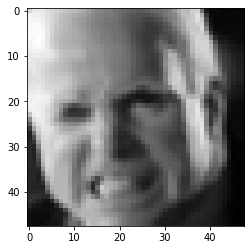

In [63]:
plt.imshow(img_gen.random_transform(array))

In [75]:
img_shape=(224,224,3)

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam

In [46]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img_shape),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),input_shape=(img_shape),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(256,(3,3),input_shape=(img_shape),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(256,(3,3),input_shape=(img_shape),activation='relu',padding='same'))
model.add(MaxPool2D((2,2),padding='same'))
model.add(Conv2D(512,(3,3),input_shape=(img_shape),activation='relu',padding='same'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 256)        

In [49]:
batch_size=16

In [50]:
train_img_gen=img_gen.flow_from_directory(train_path,target_size=img_shape[:2],batch_size=batch_size,class_mode='categorical',color_mode='grayscale')
test_img_gen=img_gen.flow_from_directory(test_path,target_size=img_shape[:2],batch_size=batch_size,class_mode='categorical',shuffle=False,color_mode='grayscale')

Found 28272 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


In [51]:
train_img_gen.image_shape

(48, 48, 1)

In [52]:
from keras.callbacks import EarlyStopping

In [53]:
early=EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
results=model.fit_generator(train_img_gen,epochs=100,validation_data=test_img_gen,callbacks=[early])

Epoch 1/100
1767/1767 [==============================] - 492s 279ms/step - loss: 1.7202 - accuracy: 0.2649 - val_loss: 1.2721 - val_accuracy: 0.2306
Epoch 2/100
1767/1767 [==============================] - 365s 206ms/step - loss: 1.5364 - accuracy: 0.3705 - val_loss: 0.9472 - val_accuracy: 0.3868
Epoch 3/100
1767/1767 [==============================] - 363s 205ms/step - loss: 1.4062 - accuracy: 0.4430 - val_loss: 0.9200 - val_accuracy: 0.4318
Epoch 4/100
1767/1767 [==============================] - 367s 208ms/step - loss: 1.3352 - accuracy: 0.4708 - val_loss: 1.2373 - val_accuracy: 0.4403
Epoch 5/100
1767/1767 [==============================] - 367s 208ms/step - loss: 1.2832 - accuracy: 0.4937 - val_loss: 0.9877 - val_accuracy: 0.4618
Epoch 6/100
1767/1767 [==============================] - 367s 208ms/step - loss: 1.2477 - accuracy: 0.5088 - val_loss: 0.9812 - val_accuracy: 0.4844
Epoch 7/100
1767/1767 [==============================] - 367s 208ms/step - loss: 1.2217 - accuracy: 0.5230

In [ ]:
prediction=model.predict_generator(test_img_gen)

In [381]:
labels=[]
for i in range(len(prediction)):
    labels.append(np.argmax(prediction[i]))
    

In [382]:
len(labels)

1

In [380]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_img_gen.classes,labels))

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(confusion_matrix(test_img_gen.classes,labels))

In [ ]:
train_img_gen.class_indices

In [ ]:
model.save('face.h5')

In [425]:
from keras.models import load_model

In [426]:
model=load_model('face.h5')

In [427]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 256)        

In [386]:
model.evaluate_generator(test_img_gen)

[1.0215362310409546, 0.4895513951778412]

In [387]:
import cv2
import numpy as np

In [390]:
image=cv2.imread('C:\\Users\\yousuf\\Desktop\\fer2013\\validation\\Surprise\\8.jpg',1)
expanded_image=np.expand_dims(image,axis=0)
predict=model.predict_classes(expanded_image)
print(predict)
cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[2]


In [389]:
test_img_gen.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Using The Model with CV2

In [6]:
from keras.models import load_model
import numpy as np
import cv2
model=load_model('face.h5')

In [7]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 256)        

In [8]:
cap=cv2.VideoCapture(0)
font=cv2.FONT_HERSHEY_COMPLEX
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    _,frame=cap.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        roi=frame[y:y+h,x:x+w]
    
        resiezed=cv2.resize(frame,(48,48))
        
        expanded_img=np.expand_dims(resiezed,axis=0)
        
        prediction=model.predict_classes(expanded_img)
        

        if prediction==0:
            cv2.putText(frame,"Angry",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==1:
            cv2.putText(frame,"Disgust",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==2:
            cv2.putText(frame,"Fear",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==3:
            cv2.putText(frame,"Happy",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==4:
            cv2.putText(frame,"Neutral",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==5:
            cv2.putText(frame,"Sad",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
        if prediction==6:
            cv2.putText(frame,"Surprise",(1,20),font,1,(0,0,255),2,cv2.LINE_AA)
    
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()